## Radio Transient Plane with all classes, including LPTs and radio magnetar single peaks

In [13]:
%matplotlib inline
import matplotlib 
import matplotlib
import matplotlib.patheffects as path_effects
params = {
    'savefig.dpi': 400, 
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'font.size': 20, 
    'text.usetex': False,
    "font.family": "Arial",
}
matplotlib.rcParams.update(params)

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc, rcParams
import adjustText
import os
import math
import numpy as np
import pandas as pd
from scipy import constants
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib import colors
import scipy
import scipy.constants as sc
import astropy
import astropy.constants as astro_cons


## Loading the data and Adjusting the units

In [14]:
data = pd.read_csv('input_data_keane_plot.csv')
data

,source,GHz s,ergs s-1 hz-1
0,psrs_2,1.241800e-02,0.009937
1,psrs_2,1.120000e-04,0.014406
2,psrs_2,1.134000e-03,0.184960
3,psrs_2,7.938000e-03,0.005702
4,psrs_2,1.120000e-04,0.000586
...,...,...,...
1702,Gosia_MagCV2,1.862872e+04,0.000462
1703,Gosia_MagCV2,7.054213e+03,0.000485
1704,Gosia_MagCV2,4.453149e+03,0.000781
1705,Gosia_MagCV2,1.391778e+03,0.002678


In [15]:
data_lpt = pd.read_csv('lpt_pulses.csv')
data_lpt

,x,y,source
0,8.875,0.163081,ASKAP J1935+2148
1,8.875,0.100394,ASKAP J1935+2148
2,44.375,2.794591,ASKAP J1935+2148
3,26.625,0.324258,ASKAP J1935+2148
4,17.750,0.421782,ASKAP J1935+2148
...,...,...,...
213,20.000,0.852129,ASKAP J1832-0911
214,10.000,0.869636,ASKAP J1832-0911
215,10.000,0.740125,ASKAP J1832-0911
216,30.000,1.144931,ASKAP J1832-0911


In [16]:
#In the dataframe the label ergs s-1 hz-1 was wrong, the true label is Jy kpc2
data.rename(columns ={'ergs s-1 hz-1':'Jy kpc2'},inplace = True)

In [17]:
# Conversion of units taking into account that 1 cm is 3.24078*1e-22 kpc and 1 Jy = erg-1 Hz-1 cm-2 1e-23 
unit_conversion = (1/1e-23)*(3.24078*1e-22)**2
def conversion_unit(x):
    # conversion function to use in the axes of the plot from  ergs s-1 hz-1 to Jy kpc2 to
    return x/unit_conversion

#Unit conversion from Jy kpc2 to ergs s-1 hz-1 
data['ergs s-1 hz-1'] = data['Jy kpc2']/unit_conversion

In [18]:
data.head()

,source,GHz s,Jy kpc2,ergs s-1 hz-1
0,psrs_2,0.012418,0.009937,9.461608e+17
1,psrs_2,0.000112,0.014406,1.371653e+18
2,psrs_2,0.001134,0.184960,1.761079e+19
3,psrs_2,0.007938,0.005702,5.429484e+17
4,psrs_2,0.000112,0.000586,5.578056e+16


In [19]:
data['source'].unique()

array(['psrs_2', 'crab_nanogiant', 'GRPs_vals', 'rrats_nohead',
       'frbs_vals_to_plot', 'solar_vals', 'SGR1935+2154', 'flarey_boi',
       'misc', 'grt', 'jupyter', 'Gosia_AGN_QSO_Blazar_TDE2',
       'Gosia_XRB2', 'Gosia_GRB2', 'Gosia_SN2', 'Gosia_RSCVn2',
       'Gosia_flare_stars2', 'Gosia_Novae2', 'Gosia_MagCV2', 'gw170817'],
      dtype=object)

In [20]:
data_radio_mag = pd.read_csv('Radio_magnetar_data.txt',delimiter = ';')
data_radio_mag

,sources,detail,Distance (kpc),nu (GHz),Width [s],Jy
0,XTEJ1810-197,(Bailes 20),3.5,0.835,0.01000,50.00
1,XTEJ1810-197,(Camilo 07),3.5,88.000,0.00200,45.00
2,XTEJ1810-197,(Camilo 06),3.5,42.000,0.00130,25.00
3,1E1547-5408,(Deller 2012),6.0,2.300,0.20000,0.10
4,PSRJ1622-4950,NaN,9.0,3.100,0.02600,0.01
5,SwiftJ1808.0-1607,(Lower) (We take the distance and width betwee...,5.0,2.500,0.00250,0.50
6,SwiftJ1808.0-1607,(Exposito) (We take the distance between the v...,5.0,1.500,0.01000,0.10
7,SGR1745-2900,(Perlman 18),8.0,8.400,0.00180,4.00
8,SGR1745-2900,(Lynch),8.0,8.700,0.01000,1.20
9,PSRJ1119-6127,(Majid 17),8.4,8.400,0.01600,0.50


In [21]:
data_radio_mag.columns

Index(['sources', 'detail', 'Distance (kpc)', 'nu (GHz)', 'Width [s]', 'Jy'], dtype='object')

In [22]:
data_radio_mag['Jykpc2'] = data_radio_mag['Jy']*data_radio_mag['Distance (kpc)']**2
data_radio_mag['GHzs'] = data_radio_mag['nu (GHz)']* data_radio_mag['Width [s]']
data_radio_mag

,sources,detail,Distance (kpc),nu (GHz),Width [s],Jy,Jykpc2,GHzs
0,XTEJ1810-197,(Bailes 20),3.5,0.835,0.01000,50.00,612.500,0.008350
1,XTEJ1810-197,(Camilo 07),3.5,88.000,0.00200,45.00,551.250,0.176000
2,XTEJ1810-197,(Camilo 06),3.5,42.000,0.00130,25.00,306.250,0.054600
3,1E1547-5408,(Deller 2012),6.0,2.300,0.20000,0.10,3.600,0.460000
4,PSRJ1622-4950,NaN,9.0,3.100,0.02600,0.01,0.810,0.080600
5,SwiftJ1808.0-1607,(Lower) (We take the distance and width betwee...,5.0,2.500,0.00250,0.50,12.500,0.006250
6,SwiftJ1808.0-1607,(Exposito) (We take the distance between the v...,5.0,1.500,0.01000,0.10,2.500,0.015000
7,SGR1745-2900,(Perlman 18),8.0,8.400,0.00180,4.00,256.000,0.015120
8,SGR1745-2900,(Lynch),8.0,8.700,0.01000,1.20,76.800,0.087000
9,PSRJ1119-6127,(Majid 17),8.4,8.400,0.01600,0.50,35.280,0.134400


## Plotting the data

In [23]:
# functions to plot the arrow in log log scale
#functions fx and fy take log-scale coordinates to 'axes' coordinates
ax = 1e-9 # [ax,bx] is range of horizontal axis 
bx = 1e10
def fx(x):
    return (np.log(x) - np.log(ax))/(np.log(bx) - np.log(ax))

ay = 1e-10 # [ay,by] is range of vertical axis
by = 1e17


def fy(y):
    return (np.log(y) - np.log(ay))/(np.log(by) - np.log(ay))

selection = data['source']=='SGR1935+2154'

x_arrow=data[selection]['GHz s'].values
y_arrow=data[selection]['Jy kpc2'].values

x_0 = fx(x_arrow[0])
y_0 = fy(y_arrow[0])
x_1 = 0
y_1 = fy(4e-10)

data_hurl = np.genfromtxt('Arsco.txt')

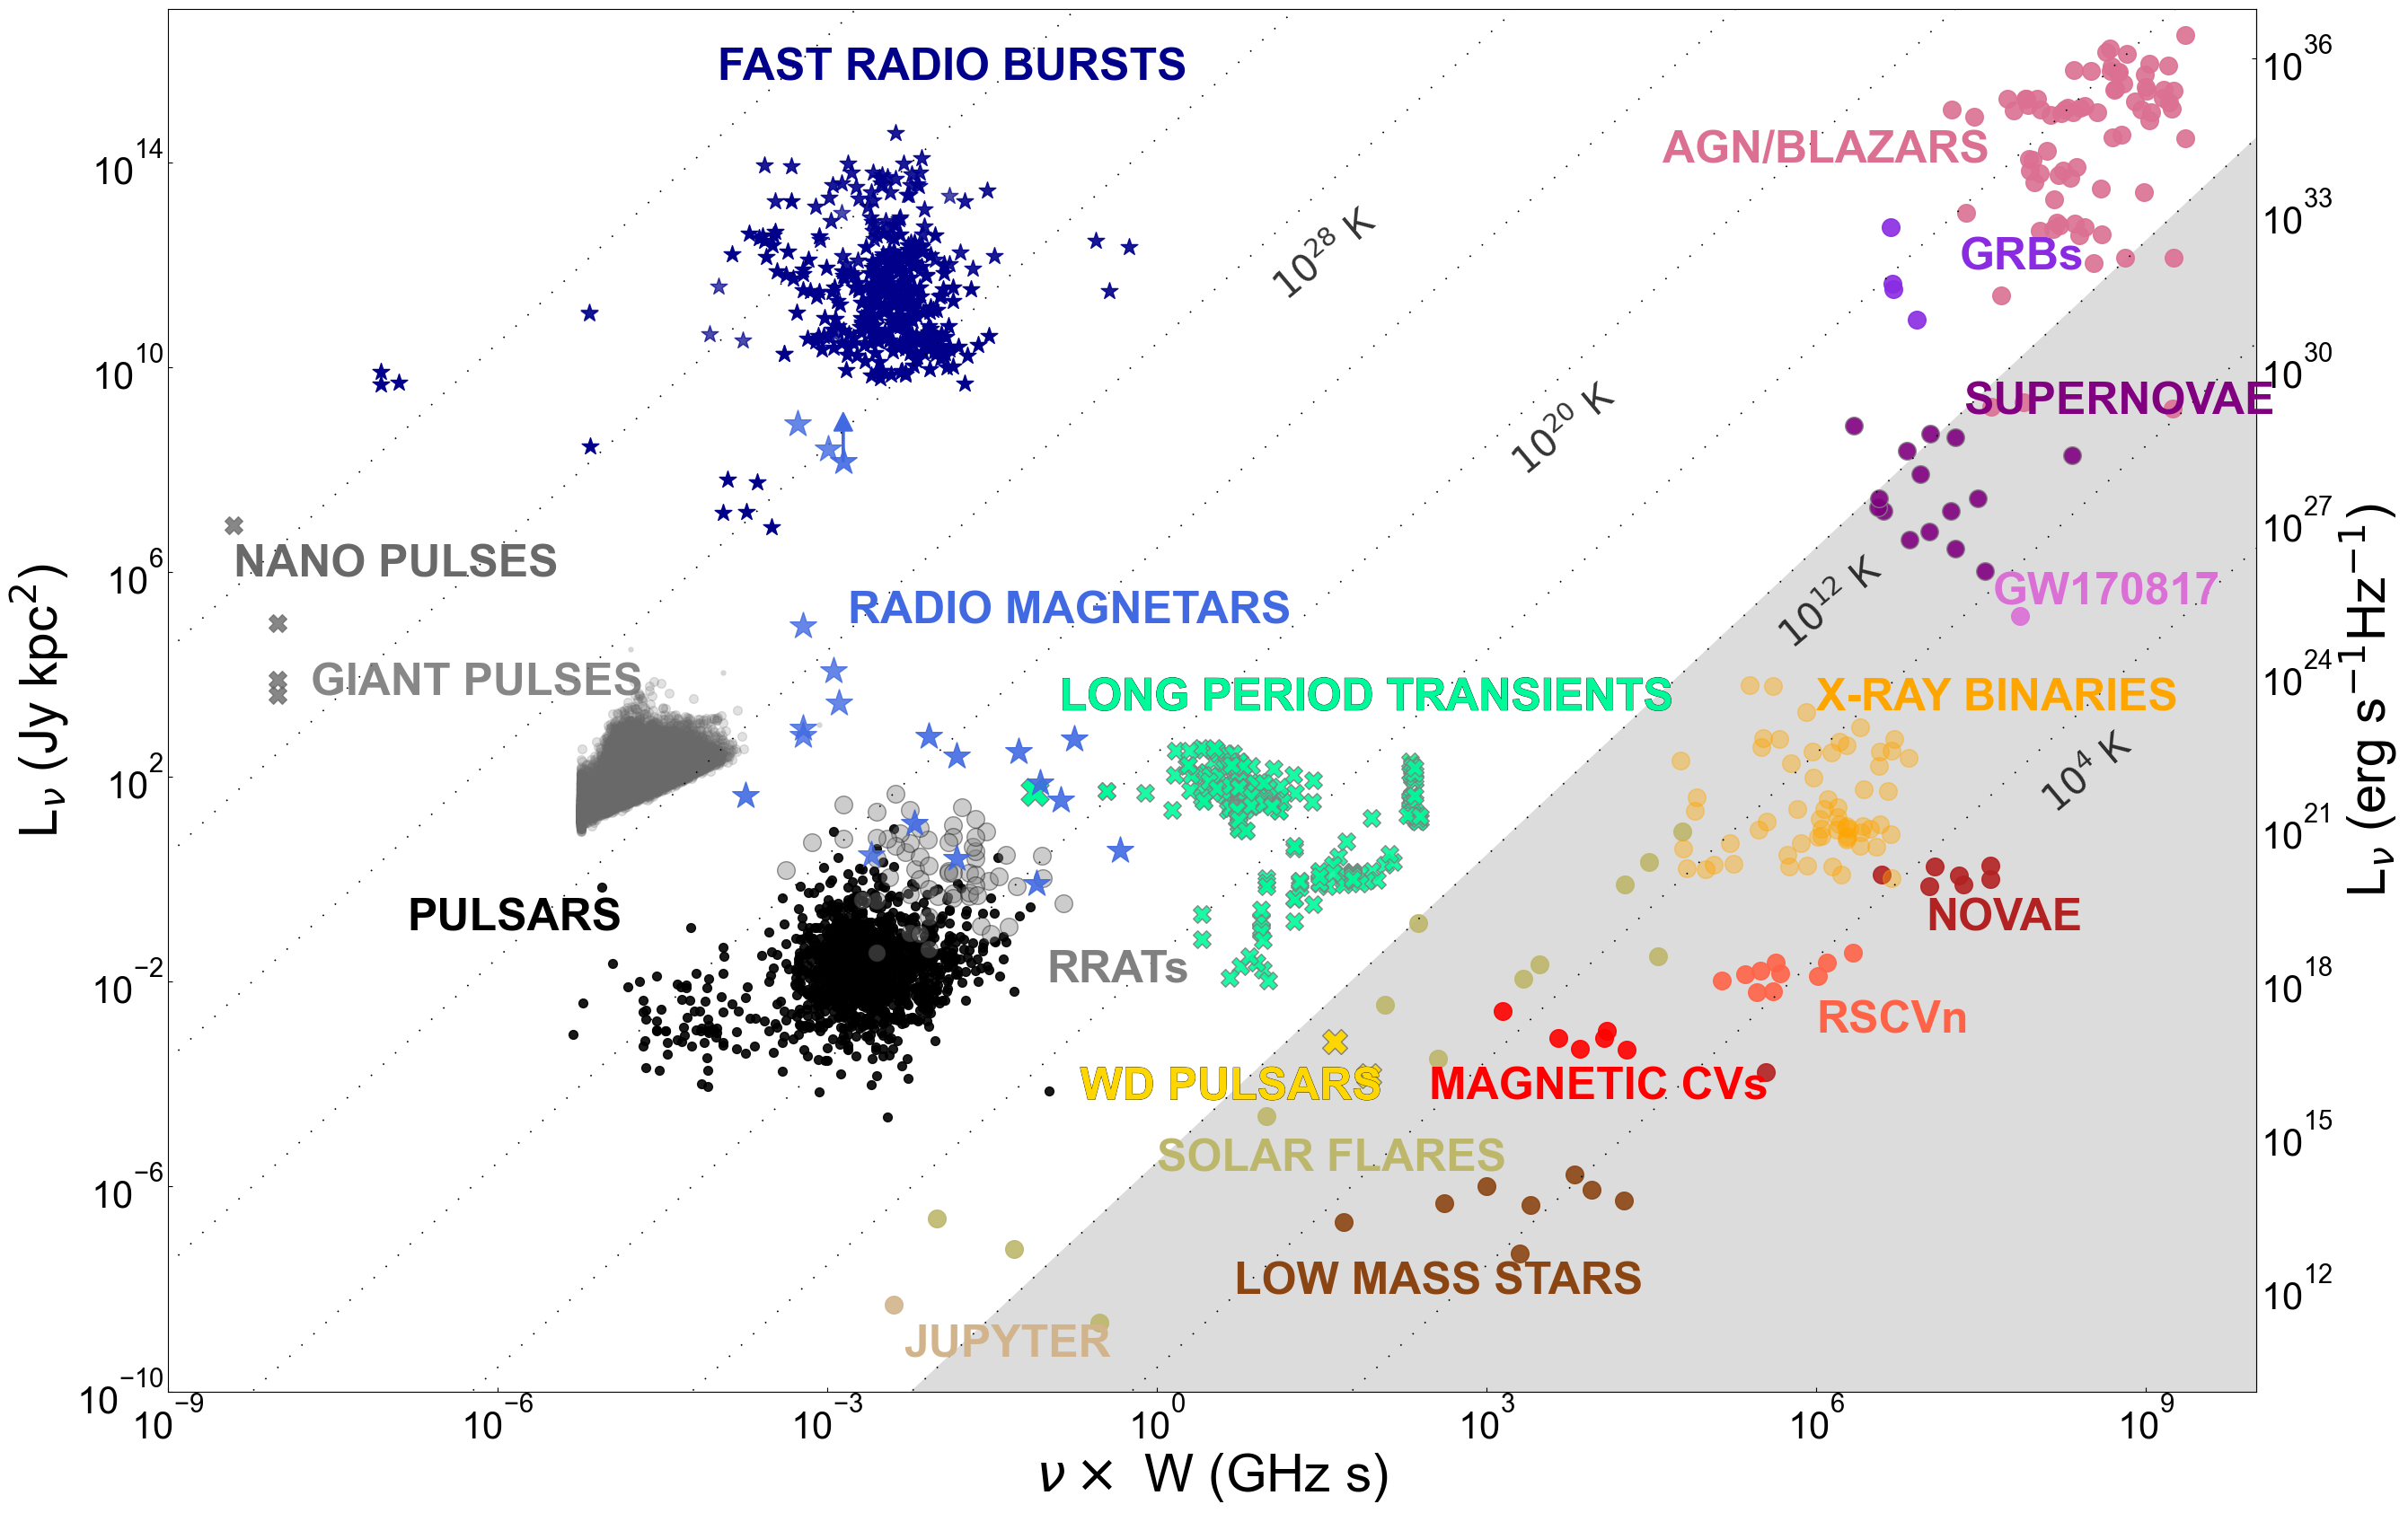

In [24]:


plt.rcParams.update({'font.size': 30})
plt.rcParams['figure.figsize'] = (30,20)
fig, ax = plt.subplots()

size_points = 200
size_inside_text = 36
alpha_points = 0.9


#Adding secondary axis
ax2 = ax.secondary_yaxis("right", functions=(conversion_unit, conversion_unit))


#Drawing the diagonal lines for constant brighness temperature
TB = [1e4,1e8,1e12,1e16,1e20,1e24,1e28,1e32,1e36,1e40]
x=np.linspace(1e-10,1e10,100)

for tb in TB:
    ax.plot(x,tb*(x**2)*2.761e-5*1.05025e-13,linestyle=(0,(1,10)),color='k',lw=1.2,alpha=1)


# add TB labels
ax.text(1e8, 20.29,r'$10^{4}$ K',rotation=40,color='k',alpha=0.8)
ax.text(4e5, 3.25e4,r'$10^{12}$ K',rotation=40,color='k',alpha=0.8)
ax.text(1.5e+3,8e+7,r'$10^{20}$ K',rotation=40,color='k',alpha=0.8)
ax.text(10.0, 2.03e11 ,r'$10^{28}$ K',rotation=40,color='k',alpha=0.8)

# Light blue colored area bellow tb = 1e12
tb = 1e12
ax.fill_between(x,tb*(x**2)*2.761e-5*1.05025e-13,color = 'gainsboro')


#-----------------Pulsars---------------------------------
selection = data['source']=='psrs_2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             marker='.',
           zorder = -3,
             s=size_points,
             alpha=alpha_points, 
             edgecolors='black',
             color='black')
#ax.text(1.0e-7,1.0e-2 ,r'Pulsars',color='black', fontsize=size_inside_text)
ax.text(1.5e-7,1.0e-1 ,r'PULSARS',color='black', fontweight='bold', fontsize=size_inside_text)
#-----------------------crab_nanogiant--------------
     
selection = data['source']=='crab_nanogiant'
plt.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             marker='X',
            zorder = -2,
             alpha=0.8, 
             s=size_points,
             color='dimgray')

#ax.text(4e-9,8e5,r'Crab Nano-GRP',color='dimgray', fontsize=size_inside_text)
ax.text(4e-9,8e5,r'NANO PULSES',color='dimgray', fontweight='bold', fontsize=size_inside_text)

#------------------RRATs---------------------
   
selection = data['source']=='rrats_nohead'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
           zorder = -2,
             marker='o',
             alpha=0.4, 
             edgecolors='black',
             s=size_points,
             color='grey')

ax.text(1e-1,1e-2,r'RRATs',color='grey', fontweight='bold', fontsize=size_inside_text)

#-------------------Solar bursts---------------
selection = data['source']== 'solar_vals'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             marker='o',
             alpha=alpha_points, 
             s=size_points,
             color='darkkhaki')

ax.text(1.0,2.0e-6 ,r'SOLAR FLARES',color='darkkhaki', fontweight='bold', fontsize=size_inside_text)

#-------------------flarey_boi------------

'''
# We remove the MKT source

selection = data['source']== 'flarey_boi'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             marker='o',
             alpha=alpha_points, 
             s=size_points,
             color='peru')

ax.text(5e6,1e-1 ,r'MKT J1704',color='peru')
'''


#-------------------GRPs_vals----------------------


selection = data['source']=='GRPs_vals'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='.',
             alpha=alpha_points, 
             s=50,
             color='lightgrey')

#ax.text(5.0e-8,4.0e4,r'Pulsars GRPs',color='slategrey', alpha=0.8, fontsize=size_inside_text)
ax.text(20.0e-9,4.0e3,r'GIANT PULSES',color='dimgrey', alpha=0.8, fontweight='bold', fontsize=size_inside_text)


#-------------------lowmass stars------------------------------


selection = data['source']=='misc' 
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='saddlebrown')

ax.text(5,0.8e-8,r'LOW MASS STARS',color='saddlebrown', fontweight='bold', fontsize=size_inside_text)


#------------------ Jupyter------------------------------

selection = data['source']=='jupyter' 
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='tan')

ax.text(5e-3,5e-10,r'JUPYTER',color='tan', fontweight='bold', fontsize=size_inside_text)
#ax.text(0.001,1e-8,r'JUPYTER',color='saddlebrown', fontweight='bold', fontsize=size_inside_text)

#-------------------CRT J1745-3009------------------------------

selection = data['source']=='grt' 
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
          marker='X',
             alpha=alpha_points,
             s=size_points,
             color='springgreen', edgecolor='gray')

#ax.text(0.8e2,5e2,r'GCRT J1745-3009',color='mediumpurple', fontsize=size_inside_text)



#---------------------Farst radio burst --frbs_vals_to_plot--------

selection = data['source']=='frbs_vals_to_plot'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='*',
             alpha=alpha_points, 
             s=size_points,
             color='darkblue')       
ax.text(0.0001,4.0e15,r'FAST RADIO BURSTS',color='darkblue', fontweight='bold', fontsize=size_inside_text)

        


#---------------------- magnetar SGR1935+2154----------------
 
selection = data['source']=='SGR1935+2154'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='*',
             alpha=alpha_points,
             s=size_points+300,
             color='royalblue')   


ax.arrow(x_0, y_0, x_1, y_1, # tell matplotlib to use axes coordinates   
          color = 'royalblue',
         transform = ax.transAxes,
        width = 0.001,
        head_width = 9*0.001)


#plt.annotate("", xy=(x, y), xytext=(x, y), arrowprops=dict(arrowstyle="->", lw=2, color='royalblue'), zorder=-1, alpha=0.7)  

#ax.text(9.0e-5,1.0e7,r'SGR1935+2154',color='purple')


# 12000          0.00115
#-------------------Stars---Gosia_flare_stars2------------

selection = data['source']=='Gosia_flare_stars2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='saddlebrown')   

#ax.text(1e5,1e-8,r'Gosia_flare_stars2',color='gold')


#--------------------White dwarf---Gosia_RSCVn2--------------------

selection = data['source']=='Gosia_RSCVn2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='tomato')   

ax.text(1.0e6,1.0e-3,r'RSCVn',color='tomato', fontweight='bold', fontsize=size_inside_text)
#ax.text(1.0e6,1.0e-3,r'White dwarfs',color='green')

#------------------White dwarf--Gosia_Novae2------------------

selection = data['source']=='Gosia_Novae2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='firebrick')   

ax.text(1.0e7,0.1,r'NOVAE',color='firebrick', fontweight='bold', fontsize=size_inside_text)


#------------------White dwarf--Gosia_MagCV2-------------

selection = data['source']=='Gosia_MagCV2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='red')   

ax.text(0.3e3,5.0e-5,r'MAGNETIC CVs',color='red', fontweight='bold', fontsize=size_inside_text)


#------------------Extragalactic sources--gw170817------------------

selection = data['source']=='gw170817'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='orchid')   

ax.text(4.0e7,2.3e+5,r'GW170817',color='orchid', fontweight='bold', fontsize=size_inside_text)

#-------------------Extragalactic sources----Gosia_SN2---------------

selection = data['source']=='Gosia_SN2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='o',
             alpha=alpha_points, 
             edgecolors='grey',
             s=size_points,
             color='purple')       
ax.text(2.2e7,12e+8,r'SUPERNOVAE',color='purple', fontweight='bold', fontsize=size_inside_text)

#----------------Extragalactic sources--Gosia_GRB2---------------------

selection = data['source']=='Gosia_GRB2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='blueviolet')

ax.text(2.0e7,8e+11,r'GRBs',color='blueviolet', fontweight='bold', fontsize=size_inside_text)

#-----------------Extragalactic sources--Gosia_AGN_QSO_Blazar_TDE2---------
selection = data['source']=='Gosia_AGN_QSO_Blazar_TDE2'
ax.scatter(x=data[selection]['GHz s'],  
           y=data[selection]['Jy kpc2'], 
           zorder=1,
           marker='o', 
           alpha=alpha_points,
           s=size_points,
           color='palevioletred')

ax.text(4.0e4,1.0e+14,r'AGN/BLAZARS',color='palevioletred', fontweight='bold', fontsize=size_inside_text)



#--------------------------radio magnetars--Rea2022------------------
selection = data_radio_mag['sources']=='XTEJ1810-197'
ax.scatter(data_radio_mag[selection]['GHzs'], data_radio_mag[selection]['Jykpc2'], zorder=1, marker='*',  alpha=alpha_points, s=size_points+300, color='royalblue')
#plt.text(0.13,2e3,r'XTE J1810-197',color = 'green', fontsize=size_inside_text)


selection = data_radio_mag['sources']=='1E1547-5408'
ax.scatter(data_radio_mag[selection]['GHzs'],
            data_radio_mag[selection]['Jykpc2'], 
           zorder=4,
           marker='*', 
          alpha=alpha_points,
           s=size_points+300,
           color='royalblue')
#plt.text(0.7,2.8,r'1E 1547-5408',color = 'darkgreen', fontsize=size_inside_text)


selection = data_radio_mag['sources']=='PSRJ1622-4950'
ax.scatter(data_radio_mag[selection]['GHzs'],
            data_radio_mag[selection]['Jykpc2'], 
           zorder=1,
           marker='*', 
           alpha=alpha_points,
           s=size_points+300,
           color='royalblue')
#plt.text(0.18,0.46,r'PSR J1622-4950',color = 'mediumseagreen', fontsize=size_inside_text)


selection = data_radio_mag['sources']=='SwiftJ1808.0-1607'
ax.scatter(data_radio_mag[selection]['GHzs'],
            data_radio_mag[selection]['Jykpc2'], 
           zorder=1,
           marker='*', 
           alpha=alpha_points,
           s=size_points+300,
           color='royalblue')
#plt.text(5e-6,4.2,r'Swift J1818.0-1607',color = 'forestgreen', zorder = 1, fontsize=size_inside_text)

selection = data_radio_mag['sources']=='SGR1745-2900'
ax.scatter(data_radio_mag[selection]['GHzs'],
            data_radio_mag[selection]['Jykpc2'], 
           zorder=3,
           marker='*', 
           alpha=alpha_points,
           s=size_points+300,
           color='royalblue')
#plt.text(6e-5,100,r'SGR 1745-2900',color = 'yellowgreen', zorder = 2, fontsize=size_inside_text)


selection = data_radio_mag['sources']=='PSRJ1119-6127'
ax.scatter(data_radio_mag[selection]['GHzs'],
            data_radio_mag[selection]['Jykpc2'], 
           zorder=1,
           marker='*', 
          alpha=alpha_points,
           s=size_points+300,
           color='royalblue')
#plt.text(0.8e-6,22,r'PSR J1119-6127',color = 'limegreen', zorder = 3, fontsize=size_inside_text)

plt.text(155e-5,100000,r'RADIO MAGNETARS',color = 'royalblue', zorder = 2, fontweight='bold', fontsize=size_inside_text)

#--------------------------------------------Kenzie Nimmo Sources---------------------------------

path_data = 'kenzie_nimo/'

#---------------------crab_giant-----------------------
crabgrp=np.loadtxt(path_data+'crab_giant.txt')
crabip=np.loadtxt(path_data+'crab_giant.ip.txt')
crabgrpx=[]
crabgrpy=[]
for n in range(len(crabgrp)):
    crabgrpx.append(crabgrp[n][0]*crabgrp[n][1]*1e-3)
    crabgrpy.append(crabgrp[n][2]/crabgrp[n][1] * (2)**2)

for n in range(len(crabip)):
    crabgrpx.append(crabip[n][0]*crabip[n][1]*1e-3)
    crabgrpy.append(crabip[n][2]/crabip[n][1] * (2)**2)

plt.scatter(crabgrpx,crabgrpy,color='dimgray',marker='.',s=size_points,alpha = 0.2,zorder = -3)
#plt.text(4e-8,5e2,r'Crab GRPs',color='dimgray', fontsize=size_inside_text)

#---------------------crab-nano-------------

cnano=np.loadtxt(path_data+'crab_nano.txt')
for n in range(len(cnano)):
    plt.scatter(cnano[n][0],cnano[n][1],color='dimgray',marker='X',alpha = 0.8, s =size_points)
#plt.text(1e-10,1e5,'Crab nanoshots',color='orange')


# ------- FRBs NIMMO -------


# FRB 121102 range
#spitler+2016, Scholz+2017, law+2017, michilli+2018, hessels+2018, gourdji+2018, gajjar+2018,hardy+2017, Houben+2019, Majid+2020, Josephy+2020, Rajwade+2020, Caleb+2020

# order is freq in GHz, width in ms and Fluence in Jy ms
frb121102=np.loadtxt(path_data+'frb121102.txt')
frb121102x=[]
frb121102y=[]
for n in range(len(frb121102)):
    frb121102x.append(frb121102[n][0]*frb121102[n][1]*1e-3)
    frb121102y.append(frb121102[n][2]/frb121102[n][1] * (972e3)**2)
    

plt.scatter(frb121102x,frb121102y,color='darkblue',marker='*',s=size_points)
#plt.text(7e-8,5e11,'FRB 20121102A',color='lightblue')

# R3 range
# CHIME/FRB discovery paper, Marcote+2020, Chawla+2020, CHIME/FRB periodicity, Pleunis+2021
frb180916=np.loadtxt(path_data+'frb180916.txt')
frb180916x=[]
frb180916y=[]
for n in range(len(frb180916)):
    frb180916x.append(frb180916[n][0]*frb180916[n][1]*1e-3)
    frb180916y.append(frb180916[n][2]/frb180916[n][1] * (149e3)**2)
    

plt.scatter(frb180916x,frb180916y,color='darkblue',marker='*',s=size_points)
#plt.text(7e-8,5e9,'FRB 20180916B',color='blue')


# SGR 1935+2154 range
sgr = np.loadtxt(path_data+'sgr1935.txt')
sgrx=[]
sgry=[]
for n in range(len(sgr)):
    sgrx = np.append(sgrx,sgr[n][1])
    sgry = np.append(sgry,sgr[n][0])

plt.scatter(sgrx,sgry,alpha=0.8,color='royalblue', zorder=3, marker='*',s=size_points+300)
#plt.text(5e-4,5e6,r'SGR1935+2154',color='seagreen',fontsize=size_inside_text)


# FRB 190711
# Macquart+2020, Kumar+2020
frb190711=np.loadtxt(path_data+'frb190711.txt')
frb190711x=[]
frb190711y=[]
for n in range(len(frb190711)):
    frb190711x.append(frb190711[n][0]*frb190711[n][1]*1e-3)
    frb190711y.append(frb190711[n][2]/frb190711[n][1] * (2700e3)**2)


plt.scatter(frb190711x,frb190711y,color='darkblue',marker='*',alpha=0.7,s=size_points)
#plt.text(7e-2,5e13,'FRB 20190711A',color='green')


# R3 Nimmo et al. 2021
frb180916_micro = np.loadtxt(path_data+'frb180916_micro.txt')
frb180916_microx=[]
frb180916_microy=[]
for n in range(len(frb180916_micro)):
    frb180916_microx.append(frb180916_micro[n][0]*frb180916_micro[n][1]*1e-3)
    frb180916_microy.append(frb180916_micro[n][2]/frb180916_micro[n][1] * (149e3)**2)


plt.scatter(frb180916_microx,frb180916_microy,color='darkblue',marker='*',alpha=0.7,s=size_points)
#plt.text(6e-8,4e13,'FRB 20180916B ', color='springgreen')

# M81R Nimmo et al. 2021b
m81nano=np.loadtxt(path_data+'m81_nano.txt')
m81nanox = []
m81nanoy = []
for n in range(len(m81nano)):
    m81nanox.append(m81nano[n][0]*m81nano[n][1]*1e-3)
    m81nanoy.append(m81nano[n][2]/m81nano[n][1] * (3.6e3)**2)


plt.scatter(m81nanox,m81nanoy,color='darkblue',marker='*',s = size_points)
#plt.text(9e-9,1e7,'FRB 20200120E', color='darkcyan')

#-------------------------- Xray-Binaries--Gosia -------------------
data_XRB = np.genfromtxt('Gosia_XRB2')
data_x = data_XRB[:,1]*data_XRB[:,8]*86400.0
data_y = data_XRB[:,6]*1.05026e-20
plt.scatter(data_x,data_y,color='orange',marker='o',s = size_points,alpha=0.4)
plt.text(0.1e7,2e3,r'X-RAY BINARIES', color='orange', fontweight='bold', fontsize=size_inside_text)

#--------------------------Ar sco-----------------------
#data_hurl = np.genfromtxt('Arsco.txt')
#plt.scatter(data_hurl[0],data_hurl[1],color='tomato',marker='o',s = size_points)
#plt.text(25,3e-4,r'Ar Sco', color='tomato', fontsize=size_inside_text)

#--------------------------WD pulsars -----------------------
ax.scatter(84, 1.46e-4, color='gold', marker="X", s=400, edgecolor='gray') # AR Sco
ax.scatter(41.34, 6.7e-4, color='gold', marker="X", s=400, edgecolor='gray') # J1912
txt1 = ax.text(x=2e-1, y=0.5e-4, color='gold', s="WD PULSARS", fontweight='bold', fontsize=size_inside_text)
# Add black outline
txt1.set_path_effects([
    path_effects.Stroke(linewidth=0.5, foreground='black'),
    path_effects.Normal()
])


#--------------------------LPT--- Gleam-X---------------------

Gleam_X_x,Gleam_X_y = 50 ,0.0770
plt.scatter(Gleam_X_y,Gleam_X_x,marker = 'X',zorder = -1,s = size_points + 300,color = 'mediumspringgreen', edgecolor='gray')
#plt.text(10,30,r'GLEM-X',color = 'purple', fontsize=size_inside_text)
txt2 = plt.text(0.13,2e3,r'LONG PERIOD TRANSIENTS',color = 'mediumspringgreen', fontweight='bold', fontsize=size_inside_text)
# Add black outline
txt2.set_path_effects([
    path_effects.Stroke(linewidth=0.5, foreground='black'),
    path_effects.Normal()
])



data_gleam = np.genfromtxt('luminosity_to_Wh.txt')
plt.scatter(data_gleam[:,1],data_gleam[:,0],marker = 'X',zorder = 1,s = size_points,color = 'mediumspringgreen')


#--------------------------- LPTs ---------------------
#selection = data_lpt['source']=='misc' 
ax.scatter(x=data_lpt['x'], 
             y=data_lpt['y'], 
            zorder=6,
             marker='X',
             alpha=alpha_points,
             s=size_points,
             color='mediumspringgreen', edgecolor='gray')

# ----------------------------------------------------------------

ax.set_ylabel(r'L$_\nu$ (Jy kpc$^{2}$)', size=42)
ax2.set_ylabel(r'L$_\nu$ (erg s$^{-1}$Hz$^{-1}$)', size=42)
ax.set_xlabel(r'$\nu \times$ W (GHz s)', size=42)
ax.set_xlim(1e-9,1e10)
ax.set_ylim(1e-10,1e17)
ax.set_yscale('log')
ax.set_xscale('log')
plt.savefig('Figure1_RadioTransientPlane_LPTreview.png')
plt.savefig('Figure1_RadioTransientPlane_LPTreview.pdf',format= 'pdf', bbox_inches="tight")

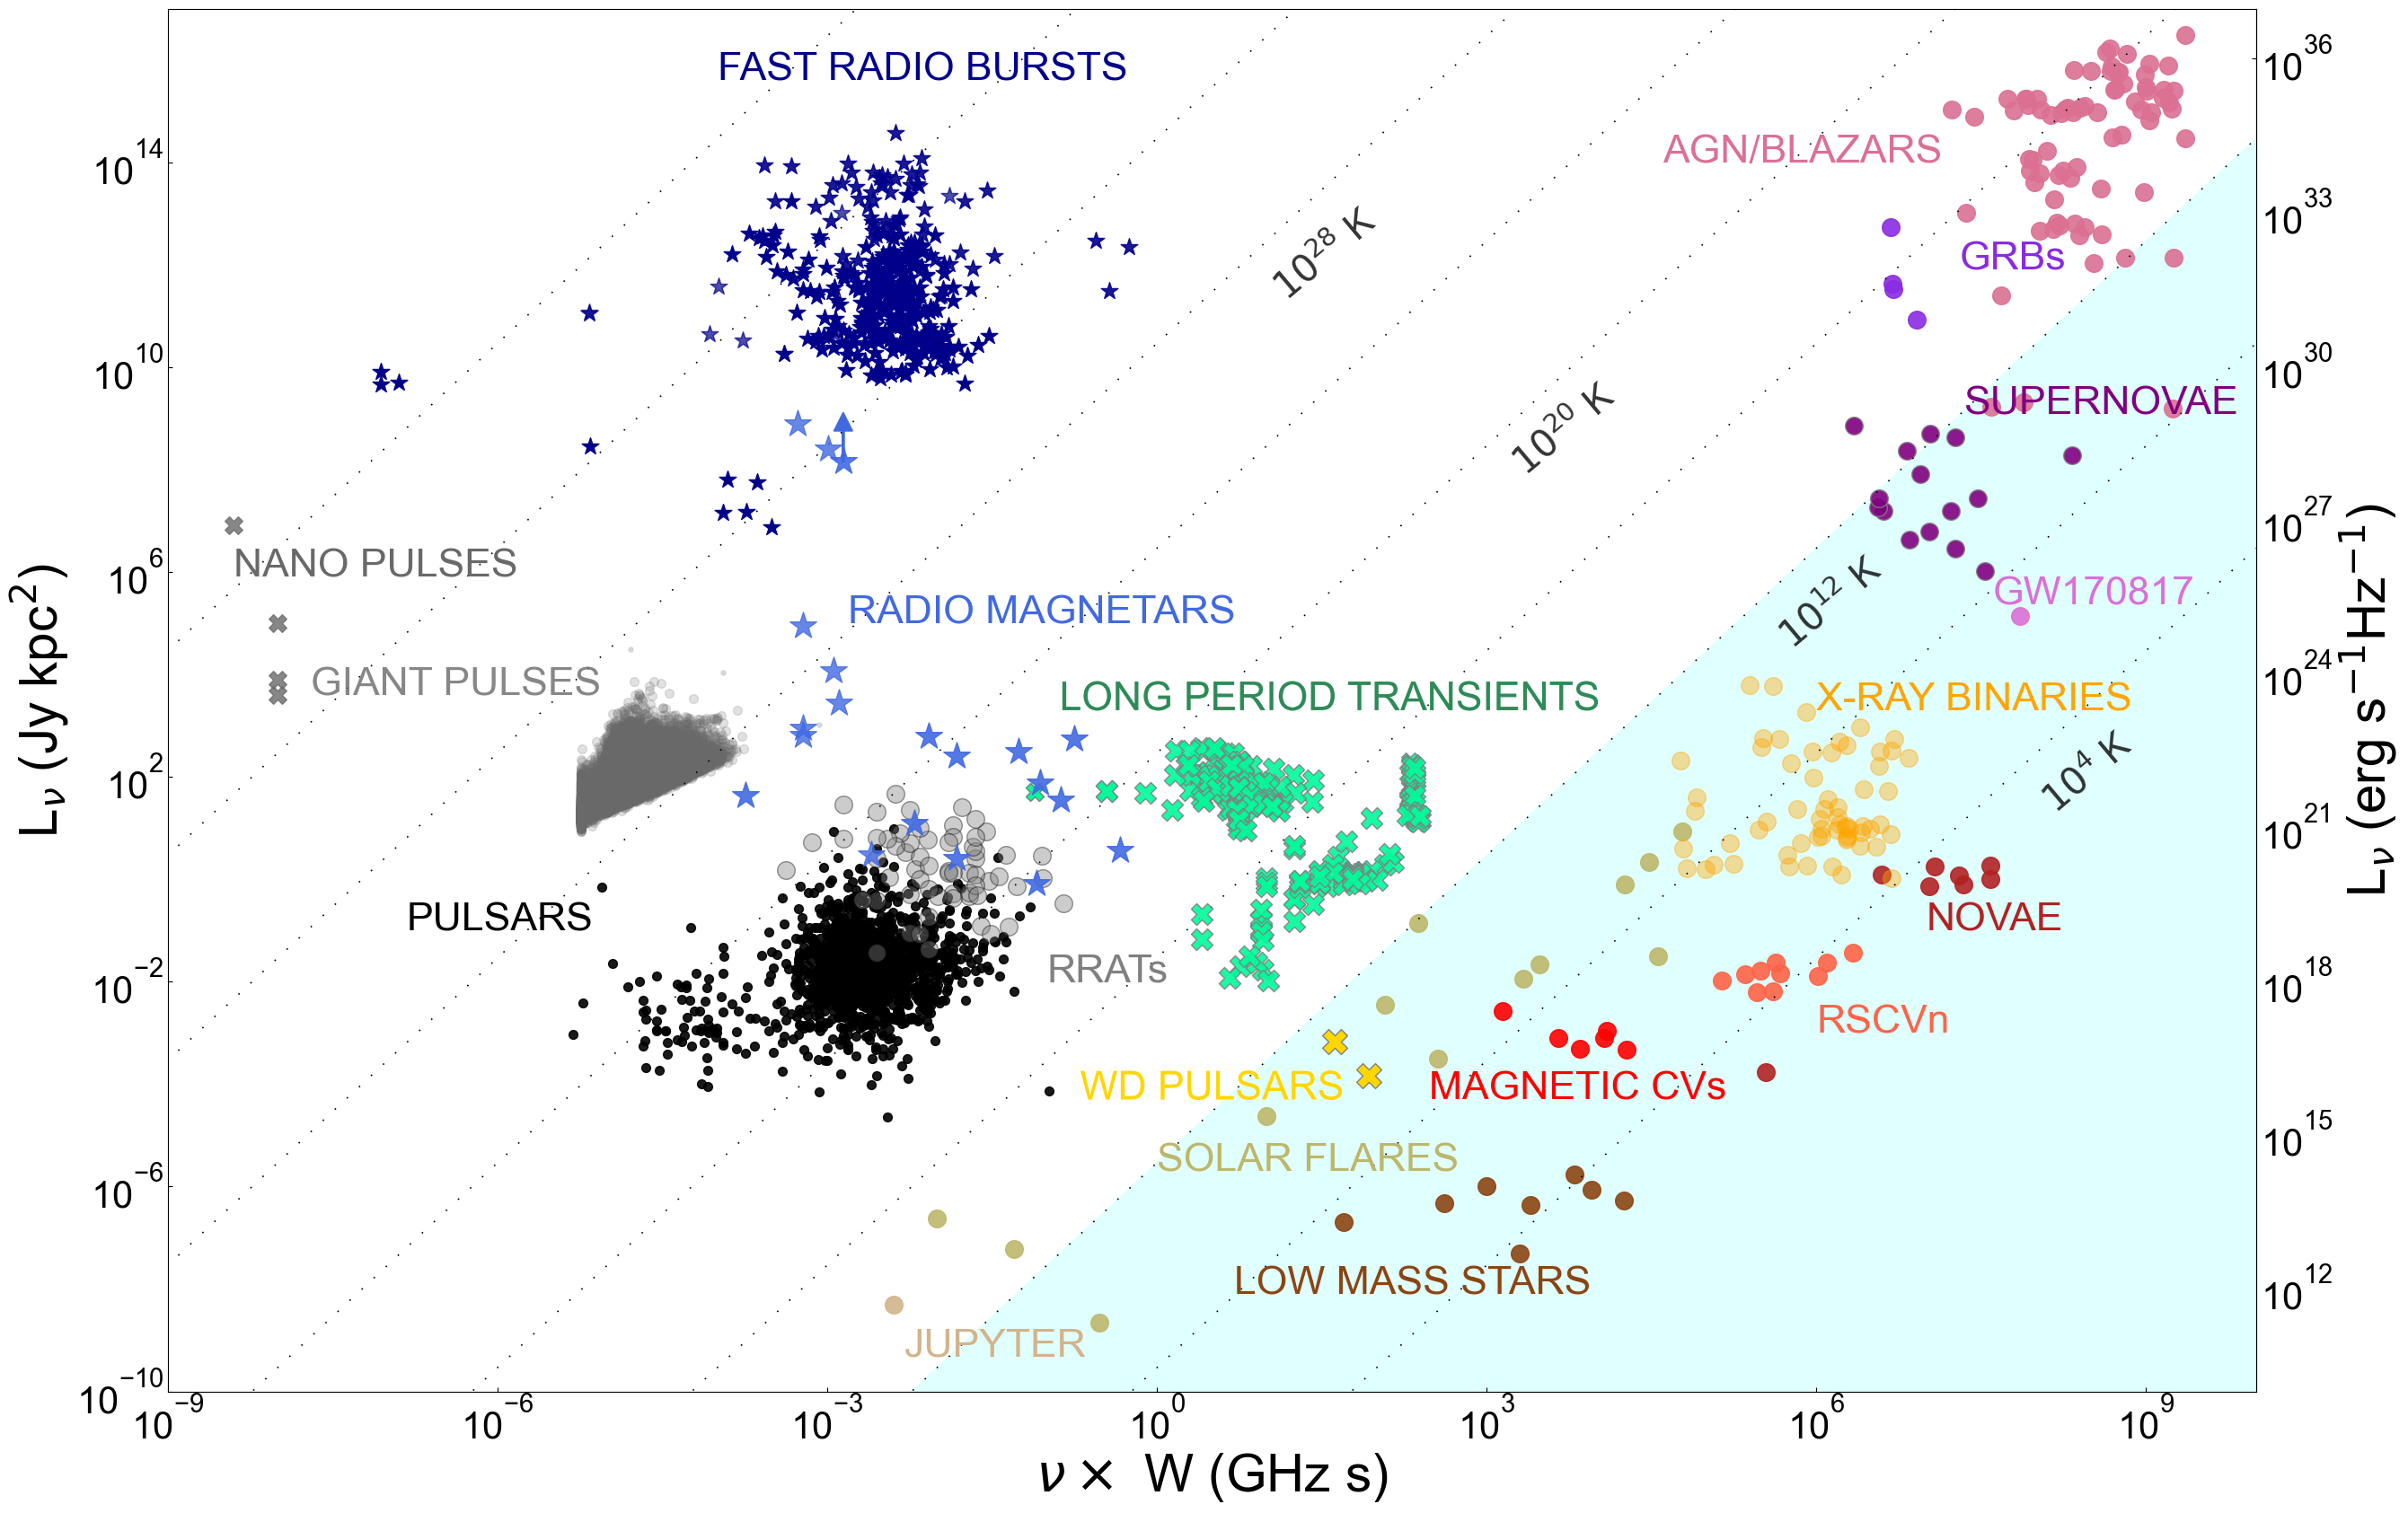

In [25]:

##### COLOUR CHANGED 2026 NEW


plt.rcParams.update({'font.size': 30})
plt.rcParams['figure.figsize'] = (30,20)
fig, ax = plt.subplots()

size_points = 200
size_inside_text = 32
alpha_points = 0.9


#Adding secondary axis
ax2 = ax.secondary_yaxis("right", functions=(conversion_unit, conversion_unit))


#Drawing the diagonal lines for constant brighness temperature
TB = [1e4,1e8,1e12,1e16,1e20,1e24,1e28,1e32,1e36,1e40]
x=np.linspace(1e-10,1e10,100)

for tb in TB:
    ax.plot(x,tb*(x**2)*2.761e-5*1.05025e-13,linestyle=(0,(1,10)),color='k',lw=1.2,alpha=1)


# add TB labels
ax.text(1e8, 20.29,r'$10^{4}$ K',rotation=40,color='k',alpha=0.8)
ax.text(4e5, 3.25e4,r'$10^{12}$ K',rotation=40,color='k',alpha=0.8)
ax.text(1.5e+3,8e+7,r'$10^{20}$ K',rotation=40,color='k',alpha=0.8)
ax.text(10.0, 2.03e11 ,r'$10^{28}$ K',rotation=40,color='k',alpha=0.8)

# Light grey colored area bellow tb = 1e12
tb = 1e12
ax.fill_between(x,tb*(x**2)*2.761e-5*1.05025e-13,color = 'lightcyan')


#-----------------Pulsars---------------------------------
selection = data['source']=='psrs_2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             marker='.',
           zorder = -3,
             s=size_points,
             alpha=alpha_points, 
             edgecolors='black',
             color='black')
#ax.text(1.0e-7,1.0e-2 ,r'Pulsars',color='black', fontsize=size_inside_text)
ax.text(1.5e-7,1.0e-1 ,r'PULSARS',color='black', fontsize=size_inside_text)
#-----------------------crab_nanogiant--------------
     
selection = data['source']=='crab_nanogiant'
plt.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             marker='X',
            zorder = -2,
             alpha=0.8, 
             s=size_points,
             color='dimgray')

#ax.text(4e-9,8e5,r'Crab Nano-GRP',color='dimgray', fontsize=size_inside_text)
ax.text(4e-9,8e5,r'NANO PULSES',color='dimgray', fontsize=size_inside_text)

#------------------RRATs---------------------
   
selection = data['source']=='rrats_nohead'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
           zorder = -2,
             marker='o',
             alpha=0.4, 
             edgecolors='black',
             s=size_points,
             color='grey')

ax.text(1e-1,1e-2,r'RRATs',color='grey', fontsize=size_inside_text)

#-------------------Solar bursts---------------
selection = data['source']== 'solar_vals'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             marker='o',
             alpha=alpha_points, 
             s=size_points,
             color='darkkhaki')

ax.text(1.0,2.0e-6 ,r'SOLAR FLARES',color='darkkhaki', fontsize=size_inside_text)

#-------------------flarey_boi------------

'''
# We remove the MKT source

selection = data['source']== 'flarey_boi'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             marker='o',
             alpha=alpha_points, 
             s=size_points,
             color='peru')

ax.text(5e6,1e-1 ,r'MKT J1704',color='peru')
'''


#-------------------GRPs_vals----------------------


selection = data['source']=='GRPs_vals'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='.',
             alpha=alpha_points, 
             s=50,
             color='lightgrey')

#ax.text(5.0e-8,4.0e4,r'Pulsars GRPs',color='slategrey', alpha=0.8, fontsize=size_inside_text)
ax.text(20.0e-9,4.0e3,r'GIANT PULSES',color='dimgrey', alpha=0.8, fontsize=size_inside_text)


#-------------------lowmass stars------------------------------


selection = data['source']=='misc' 
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='saddlebrown')

ax.text(5,0.8e-8,r'LOW MASS STARS',color='saddlebrown', fontsize=size_inside_text)


#------------------ Jupyter------------------------------

selection = data['source']=='jupyter' 
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='tan')

ax.text(5e-3,5e-10,r'JUPYTER',color='tan', fontsize=size_inside_text)
#ax.text(0.001,1e-8,r'JUPYTER',color='saddlebrown', fontweight='bold', fontsize=size_inside_text)

#-------------------CRT J1745-3009------------------------------

selection = data['source']=='grt' 
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
          marker='X',
             alpha=alpha_points,
             s=size_points,
             color='mediumspringgreen', edgecolor='gray')

#ax.text(0.8e2,5e2,r'GCRT J1745-3009',color='mediumpurple', fontsize=size_inside_text)


#-----------------------Farst radio burst------------
#-----------------------frbs_vals_to_plot--------

selection = data['source']=='frbs_vals_to_plot'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='*',
             alpha=alpha_points, 
             s=size_points,
             color='darkblue')       
ax.text(0.0001,4.0e15,r'FAST RADIO BURSTS',color='darkblue', fontsize=size_inside_text)

        


#---------------------- magnetar SGR1935+2154----------------
 
selection = data['source']=='SGR1935+2154'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='*',
             alpha=alpha_points,
             s=size_points+300,
             color='royalblue')   


ax.arrow(x_0, y_0, x_1, y_1, # tell matplotlib to use axes coordinates   
          color = 'royalblue',
         transform = ax.transAxes,
        width = 0.001,
        head_width = 9*0.001)


#plt.annotate("", xy=(x, y), xytext=(x, y), arrowprops=dict(arrowstyle="->", lw=2, color='royalblue'), zorder=-1, alpha=0.7)  

#ax.text(9.0e-5,1.0e7,r'SGR1935+2154',color='purple')


# 12000          0.00115
#----------------------Gosia_flare_stars2------------

selection = data['source']=='Gosia_flare_stars2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='saddlebrown')   

#ax.text(1e5,1e-8,r'Gosia_flare_stars2',color='gold')

#--------------------White dwarf------------------------------
#--------------------Gosia_RSCVn2--------------------

selection = data['source']=='Gosia_RSCVn2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='tomato')   

ax.text(1.0e6,1.0e-3,r'RSCVn',color='tomato', fontsize=size_inside_text)
#ax.text(1.0e6,1.0e-3,r'White dwarfs',color='green')

#-------------------Gosia_Novae2------------------

selection = data['source']=='Gosia_Novae2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='firebrick')   

ax.text(1.0e7,0.1,r'NOVAE',color='firebrick', fontsize=size_inside_text)


#-------------------Gosia_MagCV2-------------

selection = data['source']=='Gosia_MagCV2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='red')   

ax.text(0.3e3,5.0e-5,r'MAGNETIC CVs',color='red', fontsize=size_inside_text)

#------------------- Extragalactic sources ------------

#--------------------gw170817------------------

selection = data['source']=='gw170817'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
             zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='orchid')   

ax.text(4.0e7,2.3e+5,r'GW170817',color='orchid', fontsize=size_inside_text)

#-----------------------Gosia_SN2---------------

selection = data['source']=='Gosia_SN2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='o',
             alpha=alpha_points, 
             edgecolors='grey',
             s=size_points,
             color='purple')       
ax.text(2.2e7,12e+8,r'SUPERNOVAE',color='purple', fontsize=size_inside_text)

#------------------Gosia_GRB2---------------------

selection = data['source']=='Gosia_GRB2'
ax.scatter(x=data[selection]['GHz s'], 
             y=data[selection]['Jy kpc2'], 
            zorder=1,
             marker='o',
             alpha=alpha_points,
             s=size_points,
             color='blueviolet')

ax.text(2.0e7,8e+11,r'GRBs',color='blueviolet', fontsize=size_inside_text)

#-------------------Gosia_AGN_QSO_Blazar_TDE2---------
selection = data['source']=='Gosia_AGN_QSO_Blazar_TDE2'
ax.scatter(x=data[selection]['GHz s'],  
           y=data[selection]['Jy kpc2'], 
           zorder=1,
           marker='o', 
           alpha=alpha_points,
           s=size_points,
           color='palevioletred')

ax.text(4.0e4,1.0e+14,r'AGN/BLAZARS',color='palevioletred', fontsize=size_inside_text)



#---------------------------radio magnetar------------------
selection = data_radio_mag['sources']=='XTEJ1810-197'
ax.scatter(data_radio_mag[selection]['GHzs'], data_radio_mag[selection]['Jykpc2'], zorder=1, marker='*',  alpha=alpha_points, s=size_points+300, color='royalblue')
#plt.text(0.13,2e3,r'XTE J1810-197',color = 'green', fontsize=size_inside_text)


selection = data_radio_mag['sources']=='1E1547-5408'
ax.scatter(data_radio_mag[selection]['GHzs'],
            data_radio_mag[selection]['Jykpc2'], 
           zorder=4,
           marker='*', 
          alpha=alpha_points,
           s=size_points+300,
           color='royalblue')
#plt.text(0.7,2.8,r'1E 1547-5408',color = 'darkgreen', fontsize=size_inside_text)


selection = data_radio_mag['sources']=='PSRJ1622-4950'
ax.scatter(data_radio_mag[selection]['GHzs'],
            data_radio_mag[selection]['Jykpc2'], 
           zorder=1,
           marker='*', 
           alpha=alpha_points,
           s=size_points+300,
           color='royalblue')
#plt.text(0.18,0.46,r'PSR J1622-4950',color = 'mediumseagreen', fontsize=size_inside_text)


selection = data_radio_mag['sources']=='SwiftJ1808.0-1607'
ax.scatter(data_radio_mag[selection]['GHzs'],
            data_radio_mag[selection]['Jykpc2'], 
           zorder=1,
           marker='*', 
           alpha=alpha_points,
           s=size_points+300,
           color='royalblue')
#plt.text(5e-6,4.2,r'Swift J1818.0-1607',color = 'forestgreen', zorder = 1, fontsize=size_inside_text)

selection = data_radio_mag['sources']=='SGR1745-2900'
ax.scatter(data_radio_mag[selection]['GHzs'],
            data_radio_mag[selection]['Jykpc2'], 
           zorder=3,
           marker='*', 
           alpha=alpha_points,
           s=size_points+300,
           color='royalblue')
#plt.text(6e-5,100,r'SGR 1745-2900',color = 'yellowgreen', zorder = 2, fontsize=size_inside_text)


selection = data_radio_mag['sources']=='PSRJ1119-6127'
ax.scatter(data_radio_mag[selection]['GHzs'],
            data_radio_mag[selection]['Jykpc2'], 
           zorder=1,
           marker='*', 
          alpha=alpha_points,
           s=size_points+300,
           color='royalblue')
#plt.text(0.8e-6,22,r'PSR J1119-6127',color = 'limegreen', zorder = 3, fontsize=size_inside_text)

plt.text(155e-5,100000,r'RADIO MAGNETARS',color = 'royalblue', zorder = 2, fontsize=size_inside_text)

#--------------------------------------------Kenzie Nimmo Sources---------------------------------

path_data = 'kenzie_nimo/'

#---------------------crab_giant-----------------------
crabgrp=np.loadtxt(path_data+'crab_giant.txt')
crabip=np.loadtxt(path_data+'crab_giant.ip.txt')
crabgrpx=[]
crabgrpy=[]
for n in range(len(crabgrp)):
    crabgrpx.append(crabgrp[n][0]*crabgrp[n][1]*1e-3)
    crabgrpy.append(crabgrp[n][2]/crabgrp[n][1] * (2)**2)

for n in range(len(crabip)):
    crabgrpx.append(crabip[n][0]*crabip[n][1]*1e-3)
    crabgrpy.append(crabip[n][2]/crabip[n][1] * (2)**2)

plt.scatter(crabgrpx,crabgrpy,color='dimgray',marker='.',s=size_points,alpha = 0.2,zorder = -3)
#plt.text(4e-8,5e2,r'Crab GRPs',color='dimgray', fontsize=size_inside_text)

#---------------------crab-nano-------------

cnano=np.loadtxt(path_data+'crab_nano.txt')
for n in range(len(cnano)):
    plt.scatter(cnano[n][0],cnano[n][1],color='dimgray',marker='X',alpha = 0.8, s =size_points)
#plt.text(1e-10,1e5,'Crab nanoshots',color='orange')


# ------- FAST RADIO BURSTS NIMMO -------


# FRB 121102 range
#spitler+2016, Scholz+2017, law+2017, michilli+2018, hessels+2018, gourdji+2018, gajjar+2018,hardy+2017, Houben+2019, Majid+2020, Josephy+2020, Rajwade+2020, Caleb+2020

# order is freq in GHz, width in ms and Fluence in Jy ms
frb121102=np.loadtxt(path_data+'frb121102.txt')
frb121102x=[]
frb121102y=[]
for n in range(len(frb121102)):
    frb121102x.append(frb121102[n][0]*frb121102[n][1]*1e-3)
    frb121102y.append(frb121102[n][2]/frb121102[n][1] * (972e3)**2)
    

plt.scatter(frb121102x,frb121102y,color='darkblue',marker='*',s=size_points)
#plt.text(7e-8,5e11,'FRB 20121102A',color='lightblue')

# R3 range
# CHIME/FRB discovery paper, Marcote+2020, Chawla+2020, CHIME/FRB periodicity, Pleunis+2021
frb180916=np.loadtxt(path_data+'frb180916.txt')
frb180916x=[]
frb180916y=[]
for n in range(len(frb180916)):
    frb180916x.append(frb180916[n][0]*frb180916[n][1]*1e-3)
    frb180916y.append(frb180916[n][2]/frb180916[n][1] * (149e3)**2)
    

plt.scatter(frb180916x,frb180916y,color='darkblue',marker='*',s=size_points)
#plt.text(7e-8,5e9,'FRB 20180916B',color='blue')


# SGR 1935+2154 range
sgr = np.loadtxt(path_data+'sgr1935.txt')
sgrx=[]
sgry=[]
for n in range(len(sgr)):
    sgrx = np.append(sgrx,sgr[n][1])
    sgry = np.append(sgry,sgr[n][0])

plt.scatter(sgrx,sgry,alpha=0.8,color='royalblue', zorder=3, marker='*',s=size_points+300)
#plt.text(5e-4,5e6,r'SGR1935+2154',color='seagreen',fontsize=size_inside_text)


# FRB 190711
# Macquart+2020, Kumar+2020
frb190711=np.loadtxt(path_data+'frb190711.txt')
frb190711x=[]
frb190711y=[]
for n in range(len(frb190711)):
    frb190711x.append(frb190711[n][0]*frb190711[n][1]*1e-3)
    frb190711y.append(frb190711[n][2]/frb190711[n][1] * (2700e3)**2)


plt.scatter(frb190711x,frb190711y,color='darkblue',marker='*',alpha=0.7,s=size_points)
#plt.text(7e-2,5e13,'FRB 20190711A',color='green')


# R3 Nimmo et al. 2021
frb180916_micro = np.loadtxt(path_data+'frb180916_micro.txt')
frb180916_microx=[]
frb180916_microy=[]
for n in range(len(frb180916_micro)):
    frb180916_microx.append(frb180916_micro[n][0]*frb180916_micro[n][1]*1e-3)
    frb180916_microy.append(frb180916_micro[n][2]/frb180916_micro[n][1] * (149e3)**2)


plt.scatter(frb180916_microx,frb180916_microy,color='darkblue',marker='*',alpha=0.7,s=size_points)
#plt.text(6e-8,4e13,'FRB 20180916B ', color='springgreen')

# M81R Nimmo et al. 2021b
m81nano=np.loadtxt(path_data+'m81_nano.txt')
m81nanox = []
m81nanoy = []
for n in range(len(m81nano)):
    m81nanox.append(m81nano[n][0]*m81nano[n][1]*1e-3)
    m81nanoy.append(m81nano[n][2]/m81nano[n][1] * (3.6e3)**2)


plt.scatter(m81nanox,m81nanoy,color='darkblue',marker='*',s = size_points)
#plt.text(9e-9,1e7,'FRB 20200120E', color='darkcyan')

#-------------------------- XRBS -------------------
data_XRB = np.genfromtxt('Gosia_XRB2')
data_x = data_XRB[:,1]*data_XRB[:,8]*86400.0
data_y = data_XRB[:,6]*1.05026e-20
plt.scatter(data_x,data_y,color='orange',marker='o',s = size_points,alpha=0.4)
plt.text(0.1e7,2e3,r'X-RAY BINARIES', color='orange', fontsize=size_inside_text)

#--------------------------Ar sco-----------------------
#data_hurl = np.genfromtxt('Arsco.txt')
#plt.scatter(data_hurl[0],data_hurl[1],color='tomato',marker='o',s = size_points)
#plt.text(25,3e-4,r'Ar Sco', color='tomato', fontsize=size_inside_text)

#--------------------------WD pulsars -----------------------
ax.scatter(84, 1.46e-4, color='gold', marker="X", s=400, edgecolor='gray') # AR Sco
ax.scatter(41.34, 6.7e-4, color='gold', marker="X", s=400, edgecolor='gray') # J1912
txt1 = ax.text(x=2e-1, y=0.5e-4, color='gold', s="WD PULSARS", fontsize=size_inside_text)
# Add black outline
txt1.set_path_effects([
    path_effects.Stroke(linewidth=0.5, foreground='white'),
    path_effects.Normal()
])


#--------------------------- Gleam-X---------------------

Gleam_X_x,Gleam_X_y = 50 ,0.0770
plt.scatter(Gleam_X_y,Gleam_X_x,marker = 'X',zorder = -1,s = size_points,color = 'mediumspringgreen', )
#plt.text(10,30,r'GLEM-X',color = 'purple', fontsize=size_inside_text)
txt2 = plt.text(0.13,2e3,r'LONG PERIOD TRANSIENTS',color = 'seagreen', fontsize=size_inside_text)
# Add black outline
txt2.set_path_effects([
    path_effects.Stroke(linewidth=0.5, foreground='white'),
    path_effects.Normal()
])



data_gleam = np.genfromtxt('luminosity_to_Wh.txt')
plt.scatter(data_gleam[:,1],data_gleam[:,0],marker = 'X',zorder = 1,s = size_points, color = 'mediumspringgreen', edgecolor='gray')


#--------------------------- LPTs ---------------------
#selection = data_lpt['source']=='misc' 
ax.scatter(x=data_lpt['x'], 
             y=data_lpt['y'], 
            zorder=6,
             marker='X',
             alpha=alpha_points,
             s=300,
             color='mediumspringgreen', edgecolor='gray')

# ----------------------------------------------------------------

ax.set_ylabel(r'L$_\nu$ (Jy kpc$^{2}$)', size=42)
ax2.set_ylabel(r'L$_\nu$ (erg s$^{-1}$Hz$^{-1}$)', size=42)
ax.set_xlabel(r'$\nu \times$ W (GHz s)', size=42)
ax.set_xlim(1e-9,1e10)
ax.set_ylim(1e-10,1e17)
ax.set_yscale('log')
ax.set_xscale('log')
plt.savefig('Figure1_RadioTransientPlane_LPTreview_newcolor.png')
plt.savefig('Figure1_RadioTransientPlane_LPTreview_newcolor.pdf',format= 'pdf', bbox_inches="tight")

#